<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [1]:
%pwd

'C:\\Users\\jonma\\Programming\\Unit-4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [3]:
shops1 = shops.copy()
shops1['star_rating'] = shops1['star_rating'].astype(str).str[1:4]
shops1['star_rating'] = shops1['star_rating'].astype(float)
shops1.tail()

,coffee_shop_name,full_review_text,star_rating
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0
7615,The Steeping Room,5/23/2015 I finally stopped in for lunch with...,4.0


In [4]:
str(shops1['full_review_text']).split()

['0',
 '11/25/2016',
 '1',
 'check-in',
 'Love',
 'love',
 'loved',
 'the',
 'atm...',
 '1',
 '12/2/2016',
 'Listed',
 'in',
 'Date',
 'Night:',
 'Austin,',
 'Ambia...',
 '2',
 '11/30/2016',
 '1',
 'check-in',
 'Listed',
 'in',
 'Brunch',
 'Spots',
 '...',
 '3',
 '11/25/2016',
 'Very',
 'cool',
 'decor!',
 'Good',
 'drinks',
 'Nice',
 '...',
 '4',
 '12/3/2016',
 '1',
 'check-in',
 'They',
 'are',
 'located',
 'within',
 '...',
 '...',
 '7611',
 '2/19/2015',
 'I',
 'actually',
 'step',
 'into',
 'this',
 'restauran...',
 '7612',
 '1/21/2016',
 'Ok,',
 'The',
 'Steeping',
 'Room',
 'IS',
 'awesome.',
 'H...',
 '7613',
 '4/30/2015',
 'Loved',
 'coming',
 'here',
 'for',
 'tea,',
 'and',
 'the',
 '...',
 '7614',
 '8/2/2015',
 'The',
 'food',
 'is',
 'just',
 'average.',
 'The',
 'booths...',
 '7615',
 '5/23/2015',
 'I',
 'finally',
 'stopped',
 'in',
 'for',
 'lunch',
 'with...',
 'Name:',
 'full_review_text,',
 'Length:',
 '7616,',
 'dtype:',
 'object']

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [5]:
shops1['Rating'] = shops1['star_rating'].apply(lambda x: 'good' if x >= 4 else 'bad')
shops1.head()

,coffee_shop_name,full_review_text,star_rating,Rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,good
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,good
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,bad
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,good


In [6]:
import spacy
from spacy.tokenizer import Tokenizer

# load the spacy nlprocessor
nlp = spacy.load("en_core_web_lg")

# instantiate the tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [7]:
document = nlp(str(shops1['full_review_text']))
document

0        11/25/2016 1 check-in Love love loved the atm...
1        12/2/2016 Listed in Date Night: Austin, Ambia...
2        11/30/2016 1 check-in Listed in Brunch Spots ...
3        11/25/2016 Very cool decor! Good drinks Nice ...
4        12/3/2016 1 check-in They are located within ...
                              ...                        
7611     2/19/2015 I actually step into this restauran...
7612     1/21/2016 Ok, The Steeping Room IS awesome. H...
7613     4/30/2015 Loved coming here for tea, and the ...
7614     8/2/2015 The food is just average. The booths...
7615     5/23/2015 I finally stopped in for lunch with...
Name: full_review_text, Length: 7616, dtype: object

In [8]:
for token in document:
    print(token.text)

0
       
11/25/2016
1
check
-
in
Love
love
loved
the
atm
...


1
       
12/2/2016
Listed
in
Date
Night
:
Austin
,
Ambia
...


2
       
11/30/2016
1
check
-
in
Listed
in
Brunch
Spots
...


3
       
11/25/2016
Very
cool
decor
!
Good
drinks
Nice
...


4
       
12/3/2016
1
check
-
in
They
are
located
within
...

                              
...
                       

7611
    
2/19/2015
I
actually
step
into
this
restauran
...


7612
    
1/21/2016
Ok
,
The
Steeping
Room
IS
awesome
.
H
...


7613
    
4/30/2015
Loved
coming
here
for
tea
,
and
the
...


7614
    
8/2/2015
The
food
is
just
average
.
The
booths
...


7615
    
5/23/2015
I
finally
stopped
in
for
lunch
with
...


Name
:
full_review_text
,
Length
:
7616
,
dtype
:
object


 Make a pipeline for tokens

In [9]:
# empty list to add to
tokens = []

# make tokens. Tokenizer.pipe tokenizes a stream of text
for doc in tokenizer.pipe(shops1['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc] # take the token for each iteration
    tokens.append(doc_tokens) # add that token to a list

shops1['tokens'] = tokens

In [10]:
shops1.head()

,coffee_shop_name,full_review_text,star_rating,Rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,good,"[ , 11/25/2016, 1, check-in, Love, love, loved..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,good,"[ , 12/2/2016, Listed, in, Date, Night:, Austi..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,good,"[ , 11/30/2016, 1, check-in, Listed, in, Brunc..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,bad,"[ , 11/25/2016, Very, cool, decor!, Good, drin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,good,"[ , 12/3/2016, 1, check-in, They, are, located..."


In [11]:
# Function that takes a corpus of document and returns and dataframe of word counts for us to analyze.
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [12]:
word_count = count(shops1['tokens'])
word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
0,the,6520,27779,1.0,0.034334,0.034334,0.856092
76,and,6804,25748,2.0,0.031824,0.066157,0.893382
33,,7616,22606,3.0,0.027940,0.094097,1.000000
32,a,6181,22085,4.0,0.027296,0.121394,0.811581
47,I,5469,19780,5.0,0.024447,0.145841,0.718093


Now we need to use stop word removal

In [32]:
STOP_WORDS = nlp.Defaults.stop_words.union(["i've",'1', ' ', 'coffee', "it's", 'it.', "i'm", 'check-in' ])

In [28]:
# tokens = []

# """ Update those tokens w/o stopwords"""
# for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    
#     doc_tokens = []
    
#     for token in doc:
#         if (token.is_stop == False) & (token.is_punct == False):
#             doc_tokens.append(token.text.lower())

#     tokens.append(doc_tokens)

# df['tokens'] = tokens

In [33]:
tokens = []

""" Add a doc_tokens list to account for stop words"""
# tokenizer.pipe tokenizes a stream of text, looking at each token
for doc in tokenizer.pipe(shops1['full_review_text'], batch_size=500):
    
    # will be a list of valid tokens
    docs_token = []
    
    # for each token, if not a stop word or punctuation, add it to doc_tokens
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            docs_token.append(token.text.lower())
    
    tokens.append(docs_token)
    
shops1['tokens'] = tokens

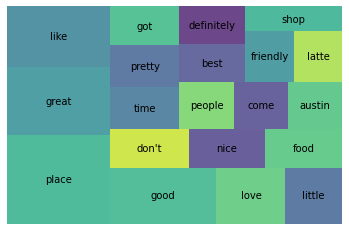

In [34]:
import squarify
import matplotlib.pyplot as plt

word_count = count(shops1['tokens'])
wc_top20 = word_count[word_count['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [35]:
word_count = count(shops1['tokens'])
word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
132,place,3029,4264,1.0,0.011224,0.011224,0.397715
78,great,2438,3250,2.0,0.008555,0.019778,0.320116
184,like,2034,2902,3.0,0.007639,0.027417,0.267069
170,good,2084,2779,4.0,0.007315,0.034732,0.273634
5,love,1434,1806,5.0,0.004754,0.039485,0.188288


## View Counts by Ratings

In [37]:

good = shops1[shops1['Rating']=='good']
bad = shops1[shops1['Rating']=='bad']

In [40]:
good.head()

,coffee_shop_name,full_review_text,star_rating,Rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,good,"[11/25/2016, love, love, loved, atmosphere!, c..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,good,"[12/2/2016, listed, date, night:, austin,, amb..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,good,"[11/30/2016, listed, brunch, spots, loved, ecl..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,good,"[12/3/2016, located, northcross, mall, shoppin..."
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0,good,"[11/20/2016, cute, cafe!, think, moment, stepp..."


C:\Users\jonma\Programming\Anaconda\envs\NLP-4-1\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


good rating


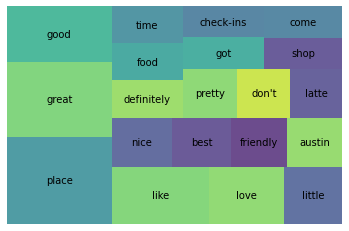

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
132,place,2432,3389,1.0,0.011463,0.011463,0.396091
78,great,2174,2902,2.0,0.009816,0.021279,0.354072
263,good,1643,2180,3.0,0.007374,0.028653,0.267590
253,like,1486,2068,4.0,0.006995,0.035648,0.242020
5,love,1263,1604,5.0,0.005426,0.041074,0.205700


In [46]:
tokens = []

""" Add a doc_tokens list to account for stop words"""
# tokenizer.pipe tokenizes a stream of text, looking at each token
for doc in tokenizer.pipe(good['full_review_text'], batch_size=500):
    
    # will be a list of valid tokens
    docs_token = []
    
    # for each token, if not a stop word or punctuation, add it to doc_tokens
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            docs_token.append(token.text.lower())
    
    tokens.append(docs_token)
    
good['tokens'] = tokens

good_word_count = count(good['tokens'])
good_wc_top20 = good_word_count[good_word_count['rank'] <= 20]

print('good rating')
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()
word_count.head()

bad rating tokens


C:\Users\jonma\Programming\Anaconda\envs\NLP-4-1\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


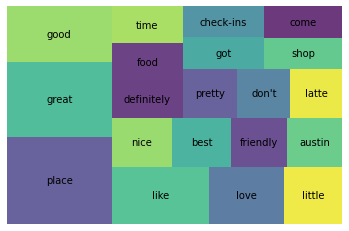

In [47]:
tokens = []

""" Add a doc_tokens list to account for stop words"""
# tokenizer.pipe tokenizes a stream of text, looking at each token
for doc in tokenizer.pipe(bad['full_review_text'], batch_size=500):
    
    # will be a list of valid tokens
    docs_token = []
    
    # for each token, if not a stop word or punctuation, add it to doc_tokens
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            docs_token.append(token.text.lower())
    
    tokens.append(docs_token)
    
bad['tokens'] = tokens

bad_word_count = count(bad['tokens'])
bad_wc_top20 = bad_word_count[bad_word_count['rank'] <= 20]

print('bad rating tokens')
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [48]:
bad_word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
153,place,597,875,1.0,0.010383,0.010383,0.404472
28,like,548,834,2.0,0.009896,0.020279,0.371274
13,good,441,599,3.0,0.007108,0.027387,0.298780
200,don't,340,430,4.0,0.005102,0.032489,0.230352
156,food,266,369,5.0,0.004379,0.036868,0.180217


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [56]:
bad_word_count['appears_in_pct_bad'] = bad_word_count['appears_in_pct']
good_word_count['appears_in_pct_good'] = good_word_count['appears_in_pct']
diff = bad_word_count[['word','appears_in_pct_bad']].merge(good_word_count[['word', 'appears_in_pct_good']], how='outer')

diff['diff'] = diff['appears_in_pct_bad'] - diff['appears_in_pct_good']
diff.sort_values(by=['diff'], ascending=False).head(10)

,word,appears_in_pct_bad,appears_in_pct_good,diff
1,like,0.371274,0.242020,0.129254
3,don't,0.230352,0.129153,0.101199
9,service,0.176829,0.093974,0.082855
12,didn't,0.150407,0.068893,0.081514
25,asked,0.098916,0.018893,0.080023
11,ordered,0.162602,0.083062,0.079540
21,wasn't,0.113144,0.041857,0.071287
43,maybe,0.099593,0.028502,0.071092
6,pretty,0.188347,0.128339,0.060008
27,better,0.110434,0.053094,0.057339


These words have the highest difference

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

